In [13]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('Combined_Ecommerce.csv')

# Make a copy of the dataset
df_copy = df.copy()



C:\Users\Edidem\AppData\Local\Temp\ipykernel_1480\2567000907.py:4: DtypeWarning: Columns (1,3,4,8,10,20,21,25,28,30,35,38,39,42,44,52,53,57,59,60,61,62,67,68,69,70,71,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Combined_Ecommerce.csv')


In [3]:
# Display basic information about the dataset
print(df_copy.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541819 entries, 0 to 541818
Data columns (total 96 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Customer ID                  338 non-null     float64
 1   Gender                       338 non-null     object 
 2   Age                          338 non-null     float64
 3   City                         338 non-null     object 
 4   Membership Type              338 non-null     object 
 5   Total Spend                  338 non-null     float64
 6   Items Purchased              338 non-null     float64
 7   Average Rating               338 non-null     float64
 8   Discount Applied             338 non-null     object 
 9   Days Since Last Purchase     338 non-null     float64
 10  Satisfaction Level           336 non-null     object 
 11  InvoiceNo                    541819 non-null  object 
 12  StockCode                    541819 non-null  object 
 13 

In [36]:
import pandas as pd
import re

def clean_column_names(df):
    def clean_name(name):
        # Remove special characters except underscores and spaces
        name = re.sub(r'[^\w\s]', '', name)
        
        # Replace spaces and underscores with nothing and capitalize following letters
        name = re.sub(r'[_\s]+([a-zA-Z])', lambda x: x.group(1).upper(), name)
        
        # Convert to lowercase
        name = name.lower()
        
        return name
    
    # Apply the cleaning function to all column names
    cleaned_columns = [clean_name(col) for col in df.columns]
    
    # Remove trailing numbers from column names
    cleaned_columns = [re.sub(r'(\d+)$', '', col).strip() for col in cleaned_columns]
    
    # Assign cleaned column names to DataFrame
    df.columns = cleaned_columns
    
    # Remove columns that are unnamed
    df = df.loc[:, ~df.columns.str.contains('unnamed', case=False)]
    
    # Remove duplicate columns
    df = df.loc[:, ~df.columns.duplicated()]
    
    # Remove any rows with null values
    df = df.dropna()
    
    return df

In [342]:
df_cleaned = clean_column_names(df_copy)

df_cleaned



,customerid,gender,age,city,membershiptype,totalspend,itemspurchased,averagerating,discountapplied,dayssincelastpurchase,...,countryregion,stateprovince,postalcode,region,category,subcategory,productname,sales,discount,profit
0,101.0,Female,29.0,New York,Gold,1120.20,14.0,4.6,True,25.0,...,United States,Texas,77095,Central,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,0.2,5.5512
3,104.0,Male,30.0,San Francisco,Gold,1480.30,19.0,4.7,False,12.0,...,United States,Illinois,60540,Central,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,0.2,-64.7748
5,106.0,Female,37.0,Houston,Bronze,440.80,8.0,3.1,False,22.0,...,United States,Kentucky,42420,South,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.82,0.0,746.4078
11,112.0,Female,36.0,Houston,Bronze,470.50,7.0,3.2,False,20.0,...,United States,California,90049,West,Office Supplies,Paper,Xerox 225,19.44,0.0,9.3312
12,113.0,Female,30.0,New York,Gold,1200.80,16.0,4.3,True,21.0,...,United States,Kentucky,42420,South,Technology,Phones,Wireless Extenders zBoost YX545 SOHO Signal Bo...,755.96,0.0,204.1092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,443.0,Male,35.0,Los Angeles,Silver,800.90,12.0,4.1,False,20.0,...,United States,California,94521,West,Furniture,Tables,Bevis 36 x 72 Conference Tables,99.592,0.2,2.4898
331,444.0,Female,41.0,Chicago,Bronze,475.25,9.0,3.6,True,48.0,...,United States,Ohio,43615,East,Furniture,Tables,Riverside Furniture Stanwyck Manor Table Series,172.11,0.4,-94.6605
332,445.0,Male,28.0,San Francisco,Gold,1480.10,21.0,4.9,False,13.0,...,United States,Arizona,85301,West,Office Supplies,Fasteners,Binder Clips by OIC,2.368,0.2,0.8288
334,447.0,Female,36.0,Houston,Bronze,470.50,8.0,3.0,False,27.0,...,United States,Arizona,85301,West,Office Supplies,Paper,Things To Do Today Spiral Book,19.008,0.2,6.8904


In [38]:

df_cleaned.to_csv('cleaned_data.csv', index=False)

In [344]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 0 to 335
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerid                   153 non-null    float64
 1   gender                       153 non-null    object 
 2   age                          153 non-null    float64
 3   city                         153 non-null    object 
 4   membershiptype               153 non-null    object 
 5   totalspend                   153 non-null    float64
 6   itemspurchased               153 non-null    float64
 7   averagerating                153 non-null    float64
 8   discountapplied              153 non-null    object 
 9   dayssincelastpurchase        153 non-null    float64
 10  satisfactionlevel            153 non-null    object 
 11  invoiceno                    153 non-null    object 
 12  stockcode                    153 non-null    object 
 13  description              

In [345]:
df_cleaned.describe()

,customerid,age,totalspend,itemspurchased,averagerating,dayssincelastpurchase,quantity,unitprice,productprice,totalpurchaseamount,...,payment,rating,productweightg,productlengthcm,productheightcm,productwidthcm,paymentinstallments,rowid,discount,profit
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,276.633987,33.614379,862.952941,12.777778,4.033333,26.228758,20.189542,3.384706,246.535948,2818.111111,...,288.535294,4.163399,885.424837,25.261438,13.294118,26.483660,3.758170,176.633987,7.966863,24.783475
std,101.905061,4.916573,367.334341,4.172627,0.593052,13.094543,47.562390,2.658299,143.080858,1474.458931,...,244.264551,1.359458,604.006989,5.655425,3.490367,10.474345,2.872341,101.905061,96.868487,111.012437
min,101.000000,26.000000,420.800000,7.000000,3.000000,9.000000,-24.000000,0.290000,10.000000,244.000000,...,0.670000,1.000000,100.000000,16.000000,2.000000,11.000000,1.000000,1.000000,0.000000,-553.647600
25%,185.000000,30.000000,505.750000,10.000000,3.500000,15.000000,3.000000,1.450000,127.000000,1422.000000,...,106.030000,4.000000,650.000000,22.000000,12.000000,16.000000,1.000000,85.000000,0.000000,2.074800
50%,281.000000,32.000000,780.200000,12.000000,4.100000,23.000000,6.000000,2.550000,249.000000,2958.000000,...,314.820000,5.000000,900.000000,25.000000,12.000000,25.000000,3.000000,181.000000,0.000000,8.619000
75%,356.000000,37.000000,1170.800000,16.000000,4.500000,37.000000,12.000000,4.950000,371.000000,3988.000000,...,381.880000,5.000000,900.000000,25.000000,13.000000,38.000000,6.000000,256.000000,0.200000,29.013600
max,448.000000,43.000000,1500.100000,21.000000,4.900000,61.000000,432.000000,16.950000,499.000000,5289.000000,...,1629.330000,5.000000,4000.000000,40.000000,24.000000,38.000000,10.000000,348.000000,1198.330000,746.407800


In [346]:
df_cleaned.describe(include='object')

,gender,city,membershiptype,discountapplied,satisfactionlevel,invoiceno,stockcode,description,invoicedate,country,...,shipmode,segment,countryregion,stateprovince,postalcode,region,category,subcategory,productname,sales
count,153,153,153,153,153,153,153,153,153,153,...,153,153,153,153,153,153,153,153,153,153
unique,2,6,3,2,3,29,127,127,25,3,...,4,3,2,30,82,4,3,15,145,150
top,Female,New York,Gold,True,Satisfied,536401,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 11:21,United Kingdom,...,Standard Class,Consumer,United States,California,22304,South,Office Supplies,Binders,Global Deluxe High-Back Manager's Chair,19.44
freq,78,29,56,78,60,15,4,4,15,138,...,97,73,150,25,8,58,92,28,2,3


In [347]:
#Checking for Duplicates and Null values as well as the data types
print(df_cleaned.duplicated().sum())

table = pd.DataFrame({
    'Unique':df_cleaned.nunique(),
    'Null':df_cleaned.isna().sum(),
    'Type':df_cleaned.dtypes.values
})
display(table)

0


,Unique,Null,Type
customerid,153,0,float64
gender,2,0,object
age,16,0,float64
city,6,0,object
membershiptype,3,0,object
...,...,...,...
subcategory,15,0,object
productname,145,0,object
sales,150,0,object
discount,10,0,float64


In [40]:
import joblib
import pandas as pd
from sklearn.pipeline import Pipeline
from cleaning import CleanColumnNames

# Create the pipeline
pipeline = Pipeline([
    ('clean_columns', CleanColumnNames())
])

# Export the pipeline
joblib.dump(pipeline, 'data_cleaning_pipeline.pkl')


['data_cleaning_pipeline.pkl']

### Distribution of Categorical Features

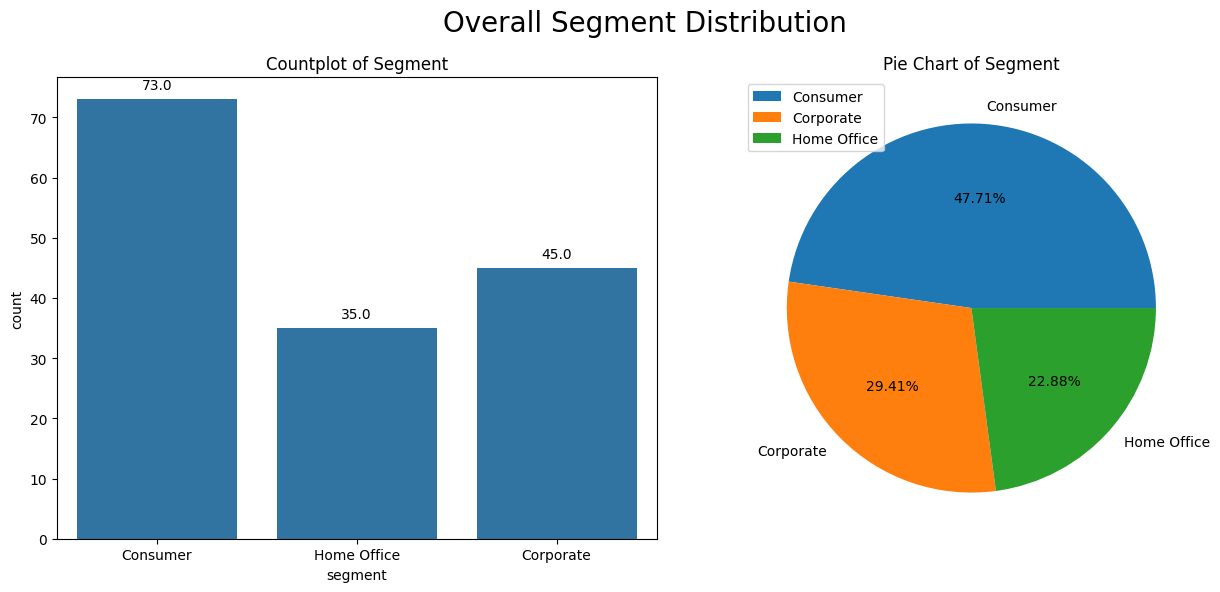

In [350]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="segment", data=df_cleaned, ax=axes[0])
axes[0].set_title("Countplot of Segment")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# Pie chart
explode = [0] * len(df_cleaned["segment"].value_counts())
axes[1].pie(df_cleaned["segment"].value_counts(), labels=df_cleaned["segment"].value_counts().index, autopct='%1.2f%%', explode=explode)
axes[1].set_title("Pie Chart of Segment")
axes[1].legend()

plt.suptitle("Overall Segment Distribution", fontsize=20)

plt.tight_layout()
plt.show()

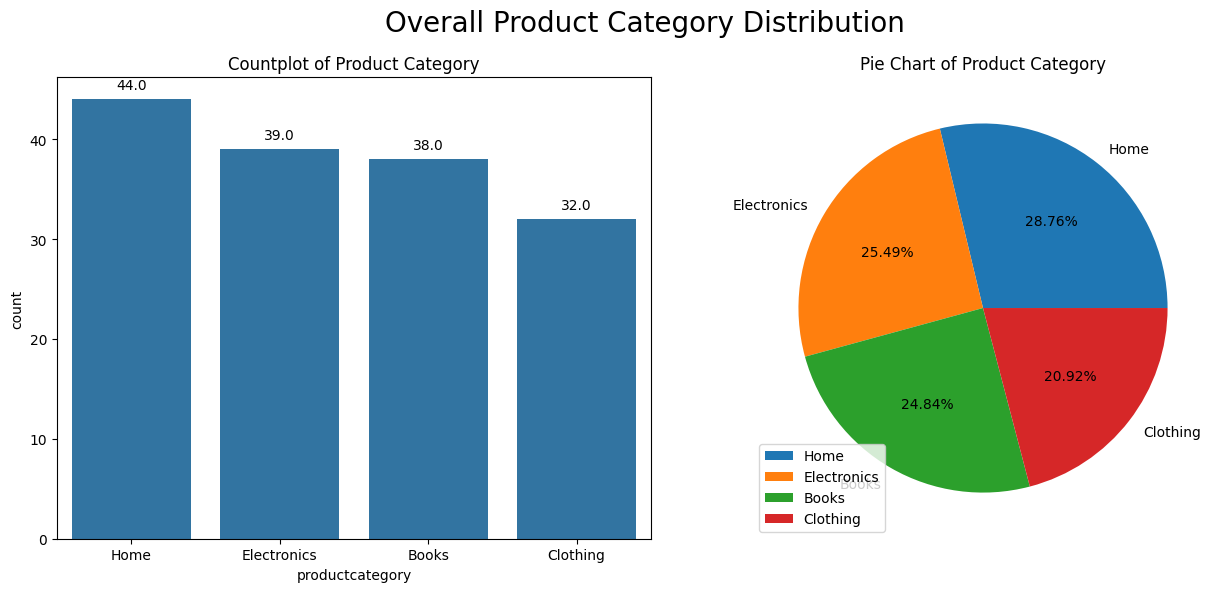

In [352]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="productcategory", data=df_cleaned, ax=axes[0])
axes[0].set_title("Countplot of Product Category")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# Pie chart
explode = [0] * len(df_cleaned["productcategory"].value_counts())
axes[1].pie(df_cleaned["productcategory"].value_counts(), labels=df["productcategory"].value_counts().index, autopct='%1.2f%%', explode=explode)
axes[1].set_title("Pie Chart of Product Category")
axes[1].legend()

plt.suptitle("Overall Product Category Distribution", fontsize=20)

plt.tight_layout()
plt.show()

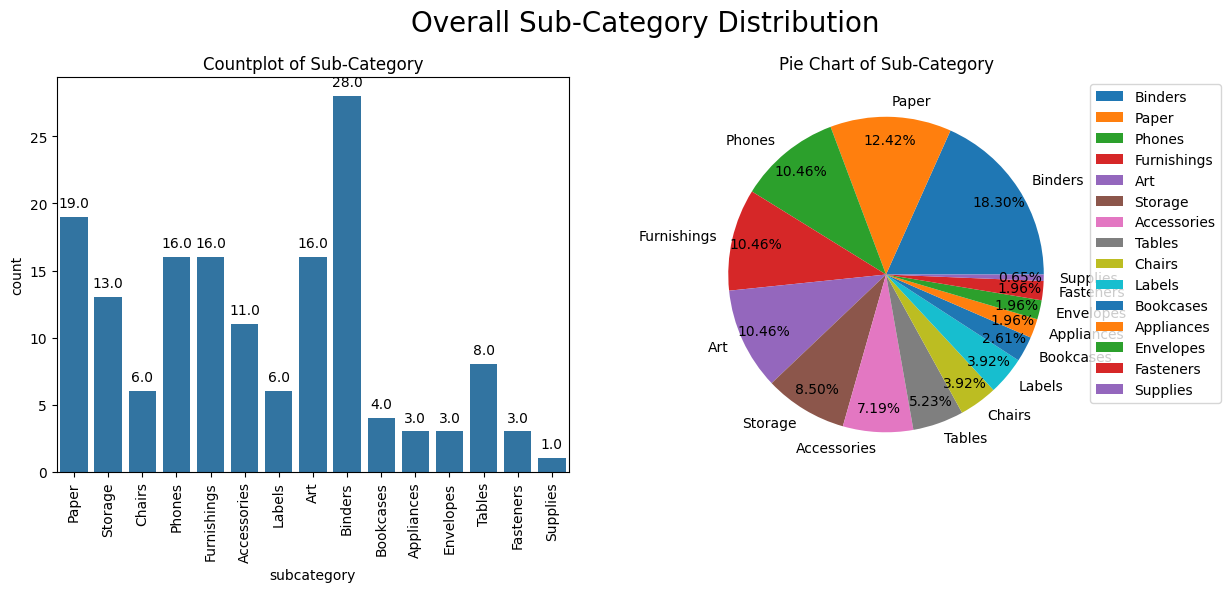

In [353]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="subcategory", data=df_cleaned, ax=axes[0])
axes[0].set_title("Countplot of Sub-Category")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Pie chart
explode = [0] * len(df_cleaned["subcategory"].value_counts())
axes[1].pie(df_cleaned["subcategory"].value_counts(), labels=df_cleaned["subcategory"].value_counts().index, autopct='%1.2f%%', explode=explode, pctdistance=0.85)
axes[1].set_title("Pie Chart of Sub-Category")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Overall Sub-Category Distribution", fontsize=20)

plt.tight_layout()
plt.show()

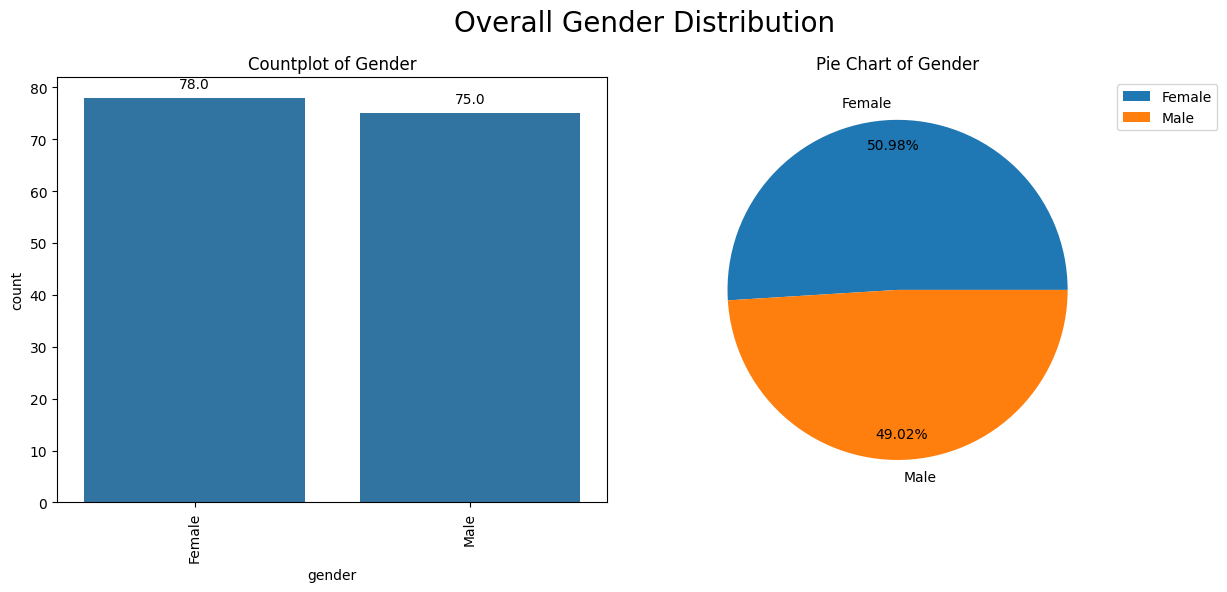

In [354]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="gender", data=df_cleaned, ax=axes[0])
axes[0].set_title("Countplot of Gender")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Pie chart
explode = [0] * len(df_cleaned["gender"].value_counts())
axes[1].pie(df_cleaned["gender"].value_counts(), labels=df_cleaned["gender"].value_counts().index, autopct='%1.2f%%', explode=explode, pctdistance=0.85)
axes[1].set_title("Pie Chart of Gender")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Overall Gender Distribution", fontsize=20)

plt.tight_layout()
plt.show()

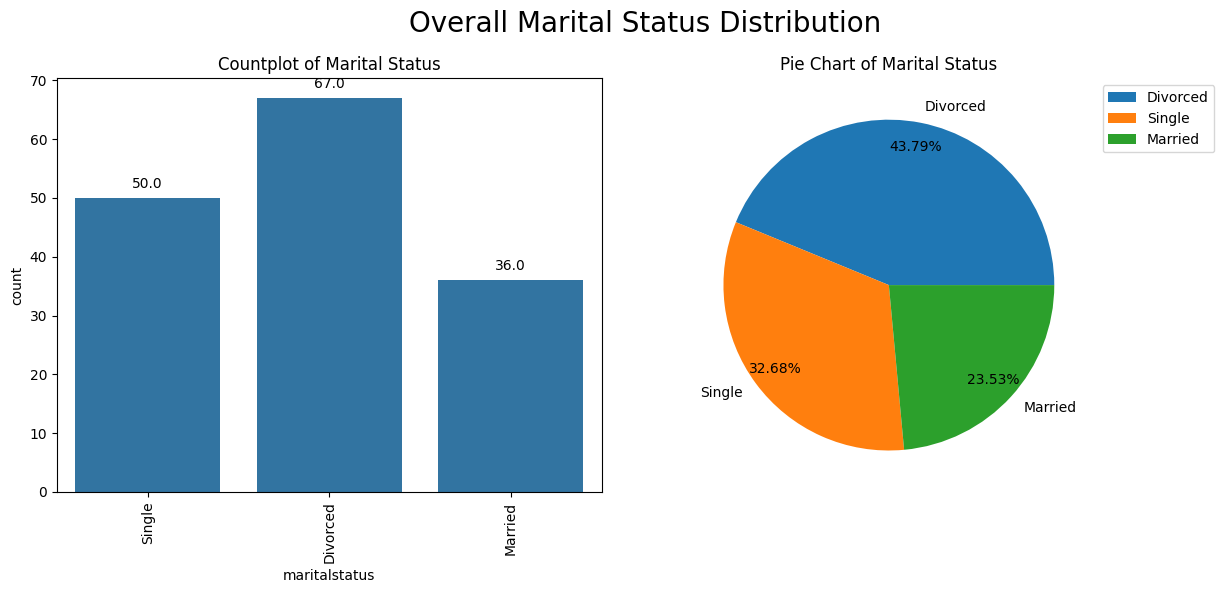

In [355]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="maritalstatus", data=df_cleaned, ax=axes[0])
axes[0].set_title("Countplot of Marital Status")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Pie chart
explode = [0] * len(df_cleaned["maritalstatus"].value_counts())
axes[1].pie(df_cleaned["maritalstatus"].value_counts(), labels=df_cleaned["maritalstatus"].value_counts().index, autopct='%1.2f%%', explode=explode, pctdistance=0.85)
axes[1].set_title("Pie Chart of Marital Status")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Overall Marital Status Distribution", fontsize=20)

plt.tight_layout()
plt.show()

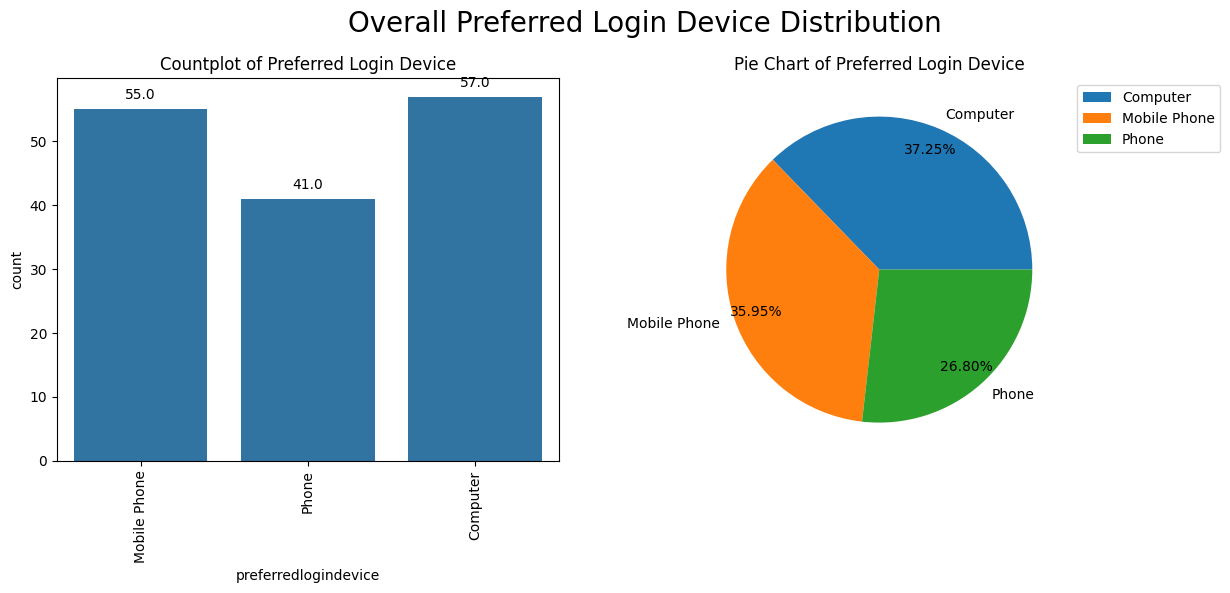

In [356]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="preferredlogindevice", data=df_cleaned, ax=axes[0])
axes[0].set_title("Countplot of Preferred Login Device")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Pie chart
explode = [0] * len(df_cleaned["preferredlogindevice"].value_counts())
axes[1].pie(df_cleaned["preferredlogindevice"].value_counts(), labels=df_cleaned["preferredlogindevice"].value_counts().index, autopct='%1.2f%%', explode=explode, pctdistance=0.85)
axes[1].set_title("Pie Chart of Preferred Login Device")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Overall Preferred Login Device Distribution", fontsize=20)

plt.tight_layout()
plt.show()

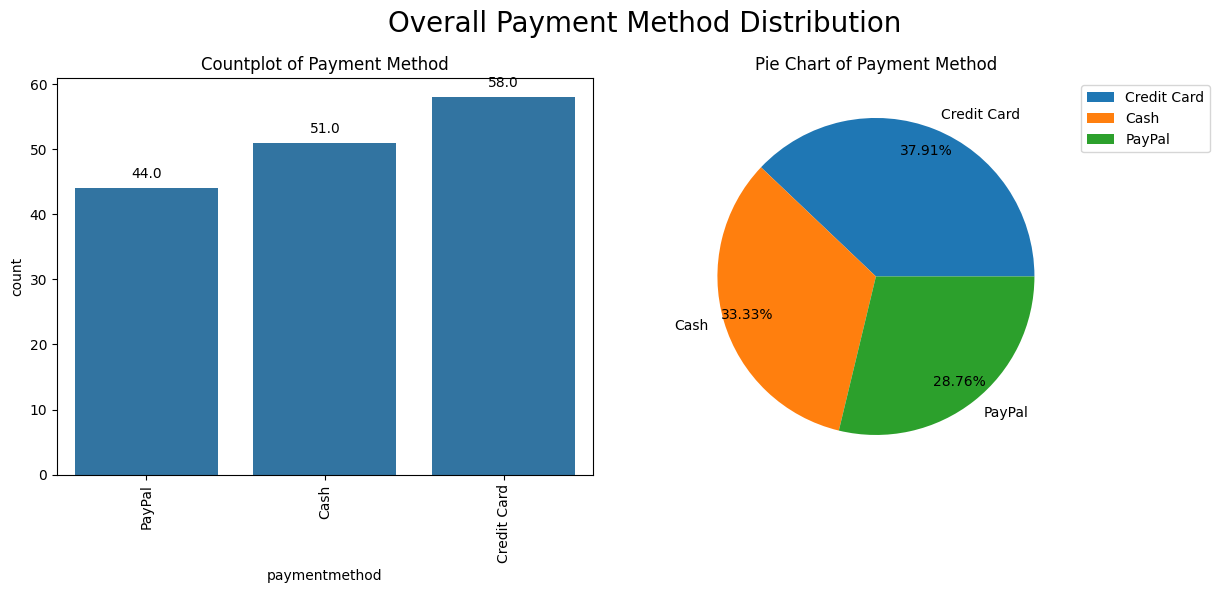

In [357]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="paymentmethod", data=df_cleaned, ax=axes[0])
axes[0].set_title("Countplot of Payment Method")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Pie chart
explode = [0] * len(df_cleaned["paymentmethod"].value_counts())
axes[1].pie(df_cleaned["paymentmethod"].value_counts(), labels=df_cleaned["paymentmethod"].value_counts().index, autopct='%1.2f%%', explode=explode, pctdistance=0.85)
axes[1].set_title("Pie Chart of Payment Method")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Overall Payment Method Distribution", fontsize=20)

plt.tight_layout()
plt.show()

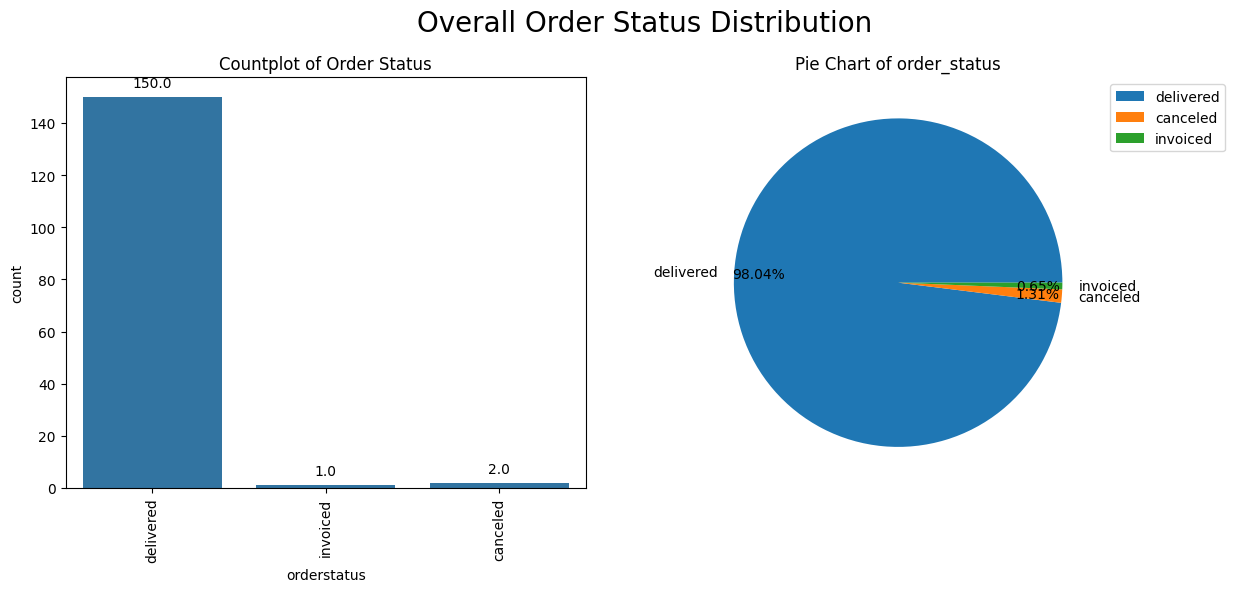

In [358]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="orderstatus", data=df_cleaned, ax=axes[0])
axes[0].set_title("Countplot of Order Status")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Pie chart
explode = [0] * len(df_cleaned["orderstatus"].value_counts())
axes[1].pie(df_cleaned["orderstatus"].value_counts(), labels=df_cleaned["orderstatus"].value_counts().index, autopct='%1.2f%%', explode=explode, pctdistance=0.85)
axes[1].set_title("Pie Chart of order_status")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Overall Order Status Distribution", fontsize=20)

plt.tight_layout()
plt.show()

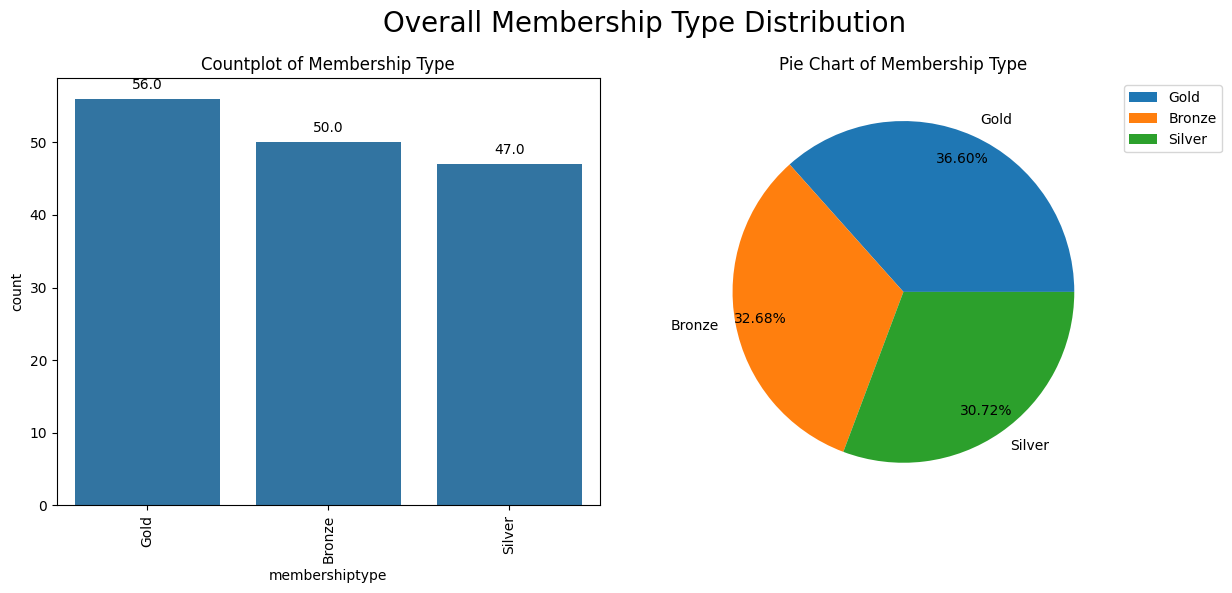

In [359]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="membershiptype", data=df_cleaned, ax=axes[0])
axes[0].set_title("Countplot of Membership Type")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Pie chart
explode = [0] * len(df_cleaned["membershiptype"].value_counts())
axes[1].pie(df_cleaned["membershiptype"].value_counts(), labels=df_cleaned["membershiptype"].value_counts().index, autopct='%1.2f%%', explode=explode, pctdistance=0.85)
axes[1].set_title("Pie Chart of Membership Type")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Overall Membership Type Distribution", fontsize=20)

plt.tight_layout()
plt.show()

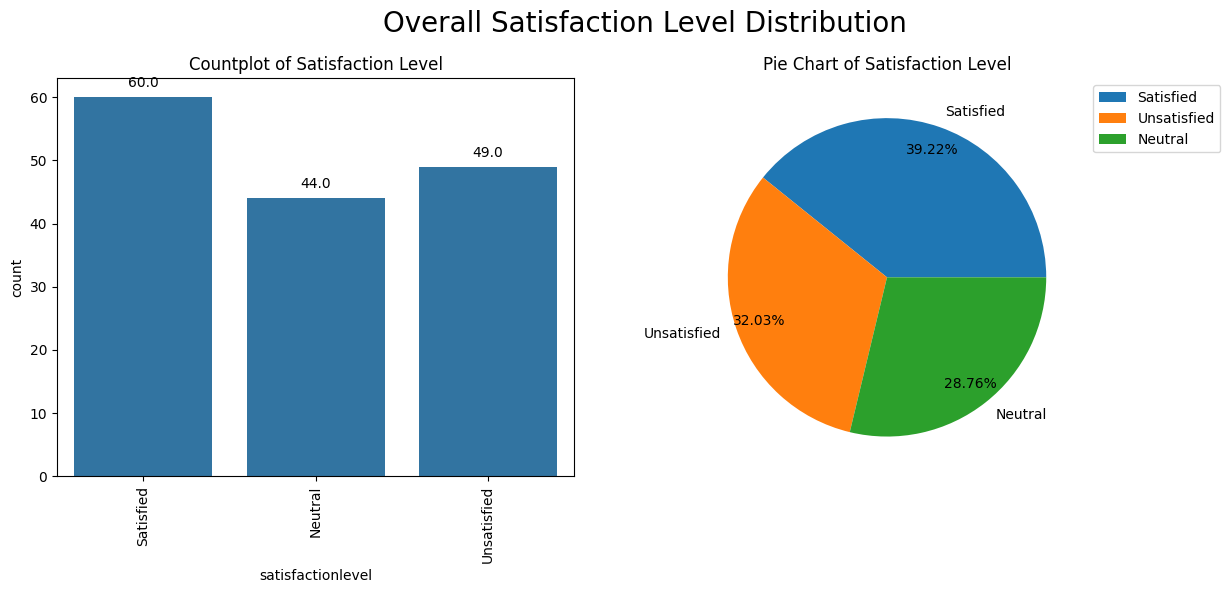

In [360]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# Countplot
sns.countplot(x="satisfactionlevel", data=df_cleaned, ax=axes[0])
axes[0].set_title("Countplot of Satisfaction Level")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height()}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Pie chart
explode = [0] * len(df_cleaned["satisfactionlevel"].value_counts())
axes[1].pie(df_cleaned["satisfactionlevel"].value_counts(), labels=df_cleaned["satisfactionlevel"].value_counts().index, autopct='%1.2f%%', explode=explode, pctdistance=0.85)
axes[1].set_title("Pie Chart of Satisfaction Level")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.suptitle("Overall Satisfaction Level Distribution", fontsize=20)

plt.tight_layout()
plt.show()

### Distribution of Numerical Features

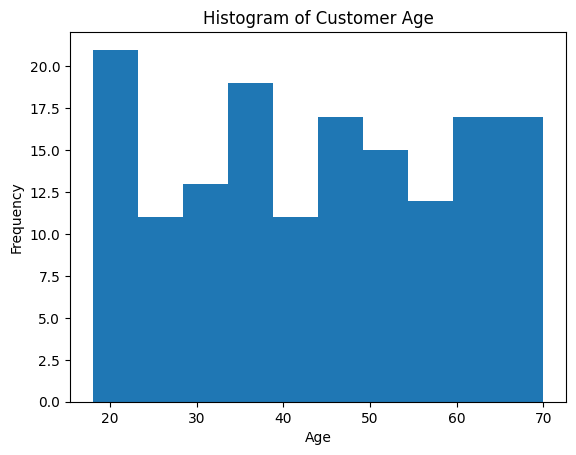

In [361]:
plt.hist(df_cleaned['customerage'], bins=10)
plt.title('Histogram of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

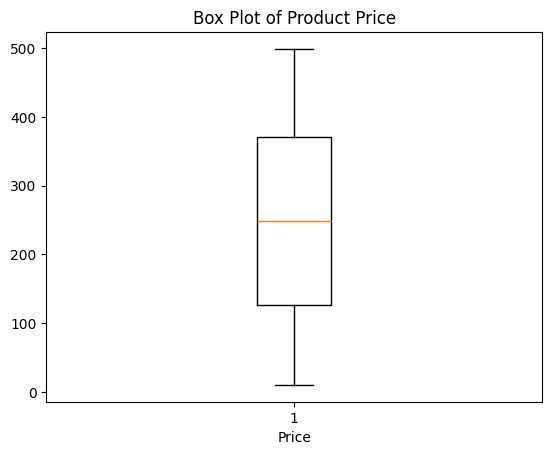

In [362]:
plt.boxplot(df_cleaned['productprice'])
plt.title('Box Plot of Product Price')
plt.xlabel('Price')
plt.show()

# Customer Segmentation


In [365]:
import pandas as pd

# Load your cleaned dataset
df_cleaned = pd.read_csv('cleaned_data.csv')

# Select relevant columns for segmentation
# Adjust the column names as necessary to match your cleaned dataset
selected_columns = [
    'totalspend', 
    'age', 
    'satisfactionscore', 
    'city', 
    'membershiptype', 
    'dayssincelastpurchase', 
    'discountapplied', 
    'ordercount'
]

# Save the selected columns to a new DataFrame
segment_df = df_cleaned[selected_columns]

# Display the first few rows of the selected features
segment_df.head()


,totalspend,age,satisfactionscore,city,membershiptype,dayssincelastpurchase,discountapplied,ordercount
0,1120.2,29.0,2.0,New York,Gold,25.0,True,1.0
1,1480.3,30.0,5.0,San Francisco,Gold,12.0,False,1.0
2,440.8,37.0,5.0,Houston,Bronze,22.0,False,6.0
3,470.5,36.0,3.0,Houston,Bronze,20.0,False,1.0
4,1200.8,30.0,3.0,New York,Gold,21.0,True,2.0


## Encoding and Standardization

In [44]:
import pandas as pd

def encode_categorical(df):
    """
    Encode categorical variables using one-hot encoding.
    
    Parameters:
    df (pd.DataFrame): DataFrame with categorical variables to encode.
    
    Returns:
    pd.DataFrame: DataFrame with encoded categorical variables.
    """
    # Apply one-hot encoding to categorical columns
    df_encoded = pd.get_dummies(df, columns=['city', 'membershiptype'])
    
    return df_encoded

# Sample usage with your DataFrame
df_encoded = encode_categorical(segment_df)
print(df_encoded.head())


   totalspend   age  satisfactionscore  dayssincelastpurchase  \
0      1120.2  29.0                2.0                   25.0   
1      1480.3  30.0                5.0                   12.0   
2       440.8  37.0                5.0                   22.0   
3       470.5  36.0                3.0                   20.0   
4      1200.8  30.0                3.0                   21.0   

   discountapplied  ordercount  city_Chicago  city_Houston  city_Los Angeles  \
0             True         1.0         False         False             False   
1            False         1.0         False         False             False   
2            False         6.0         False          True             False   
3            False         1.0         False          True             False   
4             True         2.0         False         False             False   

   city_Miami  city_New York  city_San Francisco  membershiptype_Bronze  \
0       False           True               False     

In [49]:
from sklearn.preprocessing import StandardScaler

def standardize_features(df):
    """
    Standardize numerical features in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): DataFrame with numerical features to standardize.
    
    Returns:
    pd.DataFrame: DataFrame with standardized numerical features.
    """
    # List of numerical features
    numerical_features = ['totalspend', 'age', 'satisfactionscore', 'dayssincelastpurchase', 'ordercount']
    
    # Initialize StandardScaler
    scaler = StandardScaler()
    
    # Standardize numerical features
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    
    return df

# Apply the function to the encoded DataFrame
df_standardized = standardize_features(df_encoded)
print(df_standardized.head())


   totalspend       age  satisfactionscore  dayssincelastpurchase  \
0    0.702608 -0.941618          -1.098387              -0.094146   
1    1.686133 -0.737556           1.718147              -1.090186   
2   -1.153008  0.690875           1.718147              -0.324001   
3   -1.071889  0.486814          -0.159542              -0.477238   
4    0.922747 -0.737556          -0.159542              -0.400620   

   discountapplied  ordercount  city_Chicago  city_Houston  city_Los Angeles  \
0             True   -0.557220         False         False             False   
1            False   -0.557220         False         False             False   
2            False    1.168583         False          True             False   
3            False   -0.557220         False          True             False   
4             True   -0.212059         False         False             False   

   city_Miami  city_New York  city_San Francisco  membershiptype_Bronze  \
0       False           True 

## Algorithm Selection


In [51]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


def evaluate_clustering(model, data):
    clusters = model.fit_predict(data)
    silhouette = silhouette_score(data, clusters)
    calinski_harabasz = calinski_harabasz_score(data, clusters)
    davies_bouldin = davies_bouldin_score(data, clusters)
    return silhouette, calinski_harabasz, davies_bouldin


# Create a dictionary to hold the results
results = {
    'Model': [],
    'Silhouette Score': [],
    'Calinski-Harabasz Score': [],
    'Davies-Bouldin Score': []
}

# KMeans
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_silhouette, kmeans_calinski, kmeans_davies = evaluate_clustering(kmeans_model, df_standardized)
results['Model'].append('KMeans')
results['Silhouette Score'].append(kmeans_silhouette)
results['Calinski-Harabasz Score'].append(kmeans_calinski)
results['Davies-Bouldin Score'].append(kmeans_davies)

# DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_silhouette, dbscan_calinski, dbscan_davies = evaluate_clustering(dbscan_model, df_standardized)
results['Model'].append('DBSCAN')
results['Silhouette Score'].append(dbscan_silhouette)
results['Calinski-Harabasz Score'].append(dbscan_calinski)
results['Davies-Bouldin Score'].append(dbscan_davies)

# Agglomerative Clustering
agglomerative_model = AgglomerativeClustering(n_clusters=5)
agglomerative_silhouette, agglomerative_calinski, agglomerative_davies = evaluate_clustering(agglomerative_model, df_standardized)
results['Model'].append('Agglomerative')
results['Silhouette Score'].append(agglomerative_silhouette)
results['Calinski-Harabasz Score'].append(agglomerative_calinski)
results['Davies-Bouldin Score'].append(agglomerative_davies)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


,Model,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
0,KMeans,0.372009,59.074776,1.098774
1,DBSCAN,0.046691,8.332369,1.211865
2,Agglomerative,0.371708,58.059908,1.056095


## HyperParameter tuning of Agglomerative Model

In [382]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering(model, data):
    clusters = model.fit_predict(data)
    silhouette = silhouette_score(data, clusters)
    calinski_harabasz = calinski_harabasz_score(data, clusters)
    davies_bouldin = davies_bouldin_score(data, clusters)
    return silhouette, calinski_harabasz, davies_bouldin

# Define hyperparameters to tune
n_clusters_list = [3, 4, 5, 6, 7]
linkage_methods = ['ward', 'complete', 'average', 'single']

print('Clusters', n_clusters_list)
print('linkage_method', linkage_methods)

# Create a dictionary to hold the results
tuning_results = {
    'N_Clusters': [],
    'Linkage': [],
    'Silhouette Score': [],
    'Calinski-Harabasz Score': [],
    'Davies-Bouldin Score': []
}

# Perform hyperparameter tuning
for n_clusters in n_clusters_list:
    for linkage in linkage_methods:
        agglomerative_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        silhouette, calinski_harabasz, davies_bouldin = evaluate_clustering(agglomerative_model, df_standardized)
        
        tuning_results['N_Clusters'].append(n_clusters)
        tuning_results['Linkage'].append(linkage)
        tuning_results['Silhouette Score'].append(silhouette)
        tuning_results['Calinski-Harabasz Score'].append(calinski_harabasz)
        tuning_results['Davies-Bouldin Score'].append(davies_bouldin)

# Create a DataFrame from the results
tuning_results_df = pd.DataFrame(tuning_results)

# Display the DataFrame
tuning_results_df

# Display the best combination based on the highest Silhouette Score
best_combination = tuning_results_df.loc[tuning_results_df['Silhouette Score'].idxmax()]
print("Best Combination based on Silhouette Score:")
best_combination


Clusters [3, 4, 5, 6, 7]
linkage_method ['ward', 'complete', 'average', 'single']
Best Combination based on Silhouette Score:


N_Clusters                          7
Linkage                          ward
Silhouette Score             0.490141
Calinski-Harabasz Score    111.648362
Davies-Bouldin Score         0.851904
Name: 16, dtype: object

In [57]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Final model with the best hyperparameters
final_model = AgglomerativeClustering(n_clusters=7, linkage='ward')

# Fit the model and predict clusters
clusters = final_model.fit_predict(df_standardized)

# Evaluate the final model
silhouette = silhouette_score(df_standardized, clusters)
calinski_harabasz = calinski_harabasz_score(df_standardized, clusters)
davies_bouldin = davies_bouldin_score(df_standardized, clusters)


# If you want to see the clusters assigned to each data point
df_standardized['Cluster'] = clusters



In [76]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Assuming df_standardized is your standardized dataframe and features include all necessary columns
def assign_clusters_and_analyze(df, model):
    # Fit the model and predict clusters
    clusters = model.fit_predict(df)
    
    # Add cluster labels to the original dataframe
    df['Cluster'] = clusters
    
    # Analyze cluster characteristics
    cluster_summary = df.groupby('Cluster').agg({
        'totalspend': ['mean', 'std'],
        'age': ['mean', 'std'],
        'satisfactionscore': ['mean', 'std'],
        'dayssincelastpurchase': ['mean', 'std'],
        'discountapplied': ['mean'],
        'ordercount': ['mean', 'std']
    }).reset_index()
    
    return df, cluster_summary

def find_similar_customers(df, customer_index):
    # Get the cluster of the specified customer
    customer_cluster = df.loc[customer_index, 'Cluster']
    
    # Find customers in the same cluster
    similar_customers = df[df['Cluster'] == customer_cluster]
    
    return similar_customers

# Fit the model
best_model = AgglomerativeClustering(n_clusters=7, linkage='ward')
df_with_clusters, cluster_summary = assign_clusters_and_analyze(df_standardized, best_model)

# Display the cluster summary
print("Cluster Summary:")
print (cluster_summary)



Cluster Summary:
  Cluster totalspend                 age           satisfactionscore  \
                mean       std      mean       std              mean   
0       0  -0.476060  0.045680 -0.941618  0.553742         -0.322820   
1       1  -1.128290  0.048630  0.639860  0.162025          0.153406   
2       2  -0.988366  0.044469  1.734729  0.185478          0.021005   
3       3  -0.162541  0.046616  0.112701  0.143244          0.153406   
4       4   1.627850  0.119371 -0.950490  0.189422          0.207832   
5       5   0.835596  0.071464 -0.613345  0.159723         -0.200362   
6       6   1.096755  0.413787 -0.553901  0.435013         -0.065658   

            dayssincelastpurchase           discountapplied ordercount  \
        std                  mean       std            mean       mean   
0  1.006885              1.394918  0.796519             1.0  -0.031976   
1  1.060256             -0.253767  0.253528             0.0   0.046811   
2  0.920613              1.096388  0.2

In [64]:
# Example: Find similar customers to the customer at index 0
similar_customers = find_similar_customers(df_with_clusters, 0)
print("Similar Customers:")
print(similar_customers[['totalspend', 'age', 'satisfactionscore', 'dayssincelastpurchase', 'discountapplied', 'ordercount']])


Similar Customers:
     totalspend       age  satisfactionscore  dayssincelastpurchase  \
0      0.702608 -0.941618          -1.098387              -0.094146   
4      0.922747 -0.737556          -0.159542              -0.400620   
8      0.839443 -0.329433          -0.159542               0.212328   
12     0.758325 -0.533495          -1.098387               0.059091   
15     0.895434 -0.737556          -0.159542              -0.477238   
30     0.731013 -0.533495          -0.159542              -0.017527   
38     0.758325 -0.533495           1.718147               0.059091   
46     0.731013 -0.533495          -1.098387              -0.017527   
71     0.758325 -0.533495           0.779302               0.059091   
76     0.868122 -0.737556           0.779302              -0.553857   
86     0.812131 -0.329433          -1.098387              -0.324001   
89     0.949513 -0.533495          -1.098387              -0.630475   
95     0.868122 -0.737556           0.779302              

c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


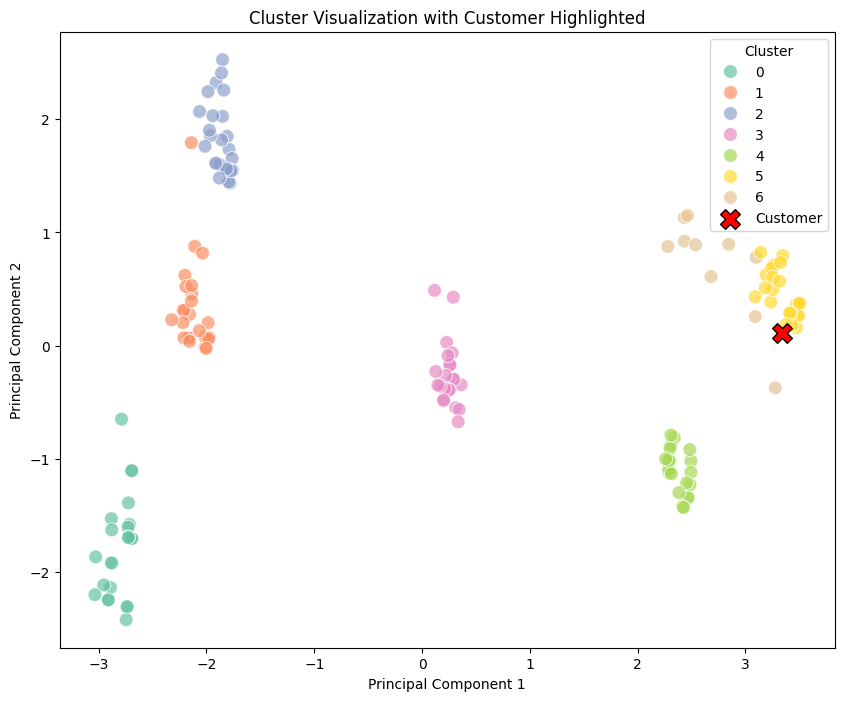

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def predict_customer_cluster(model, data, customer_data):
    # Fit the model and predict clusters
    clusters = model.fit_predict(data)
    
    # Perform PCA for dimensionality reduction
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    
    # Transform customer data to PCA space
    customer_reduced = pca.transform([customer_data])
    
    # Predict cluster for customer
    customer_cluster = model.fit_predict(data)[-1]  # Find the cluster of the customer
    
    return clusters, reduced_data, customer_reduced, customer_cluster

def visualize_customer_on_clusters(model, data, customer_data):
    # Fit the model and get cluster labels
    clusters, reduced_data, customer_reduced, customer_cluster = predict_customer_cluster(model, data, customer_data)
    
    # Create a DataFrame for visualization
    visualization_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
    visualization_df['Cluster'] = clusters
    
    # Plot the clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=visualization_df, s=100, alpha=0.7)
    
    # Plot the customer data
    plt.scatter(customer_reduced[0, 0], customer_reduced[0, 1], color='red', s=200, edgecolor='black', marker='X', label='Customer')
    
    plt.title('Cluster Visualization with Customer Highlighted')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.show()

# Example customer data (replace with actual customer feature values)
example_customer_data = df_standardized.iloc[0].values

# Visualize clusters with the example customer highlighted
visualize_customer_on_clusters(best_model, df_standardized, example_customer_data)


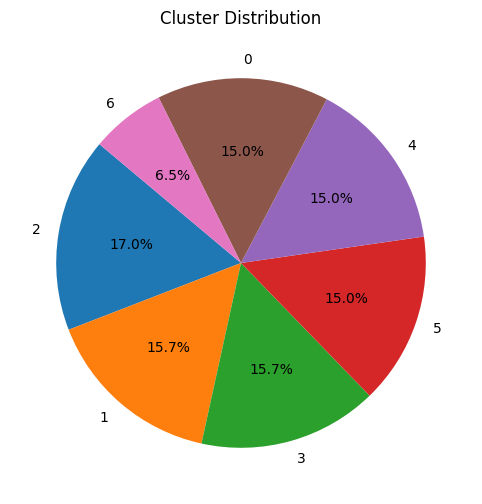

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


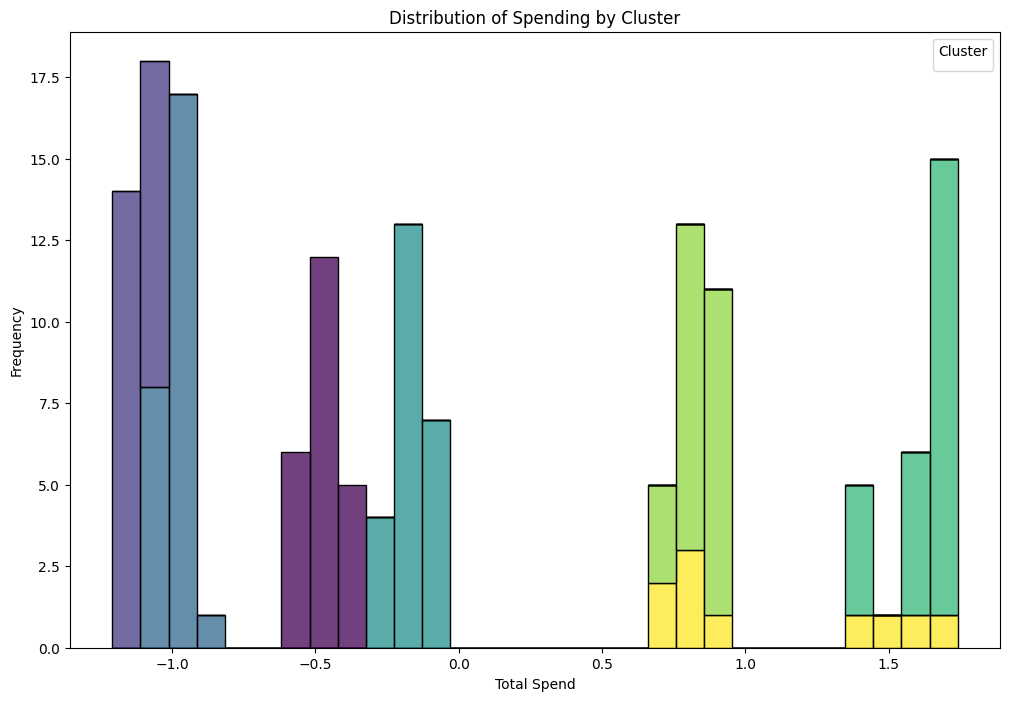

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie Chart for Cluster Distribution
def plot_cluster_distribution(df):
    cluster_counts = df['Cluster'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Cluster Distribution')
    plt.show()

# Histogram for Spending Distribution in Each Cluster
def plot_spending_distribution(df):
    plt.figure(figsize=(12, 8))
    sns.histplot(data=df, x='totalspend', hue='Cluster', multiple='stack', bins=30, palette='viridis')
    plt.title('Distribution of Spending by Cluster')
    plt.xlabel('Total Spend')
    plt.ylabel('Frequency')
    plt.legend(title='Cluster')
    plt.show()

# Example of Using the Functions
plot_cluster_distribution(df_with_clusters)
plot_spending_distribution(df_with_clusters)


# Fraud Detection Task

### Feature Selection

In [179]:
import pandas as pd

# Load the dataset
fraud_df = pd.read_csv('cleaned_data.csv')

# Define the selected features
selected_features = [
    'age',
    'totalspend',
    'itemspurchased',
    'productprice',
    'totalpurchaseamount',
    'couponused',
    'cashbackamount',
    'ordercount',
    'dayssincelastpurchase',
    'daysincelastorder',
    'quantity',
    'unitprice',
    'hourspendonapp',
    'numberofdeviceregistered',
    'complain',
    'churn',
    'tenure',
    'gender',
    'city',
    'membershiptype',
    'paymentmethod',
    'shipmode'
]

# Select the features from the dataset
fraud_df_selected = fraud_df[selected_features]

# Display the selected features
fraud_df_selected.head()


,age,totalspend,itemspurchased,productprice,totalpurchaseamount,couponused,cashbackamount,ordercount,dayssincelastpurchase,daysincelastorder,...,hourspendonapp,numberofdeviceregistered,complain,churn,tenure,gender,city,membershiptype,paymentmethod,shipmode
0,29.0,1120.2,14.0,177.0,2427.0,1.0,159.93,1.0,25.0,5.0,...,3.0,3.0,1.0,0.0,4.0,Female,New York,Gold,PayPal,Standard Class
1,30.0,1480.3,19.0,396.0,937.0,0.0,134.07,1.0,12.0,3.0,...,2.0,4.0,0.0,0.0,0.0,Male,San Francisco,Gold,Cash,Standard Class
2,37.0,440.8,8.0,191.0,3722.0,4.0,139.19,6.0,22.0,7.0,...,3.0,5.0,1.0,0.0,0.0,Female,Houston,Bronze,Credit Card,Standard Class
3,36.0,470.5,7.0,304.0,3883.0,0.0,153.81,1.0,20.0,0.0,...,3.0,4.0,1.0,0.0,11.0,Female,Houston,Bronze,PayPal,Second Class
4,30.0,1200.8,16.0,54.0,4187.0,2.0,134.41,2.0,21.0,2.0,...,2.0,3.0,1.0,0.0,0.0,Female,New York,Gold,PayPal,Standard Class


Mean Total Purchase Amount: 2818.1111111111113
Median Total Purchase Amount: 2958.0
Standard Deviation of Total Purchase Amount: 1474.4589308925797


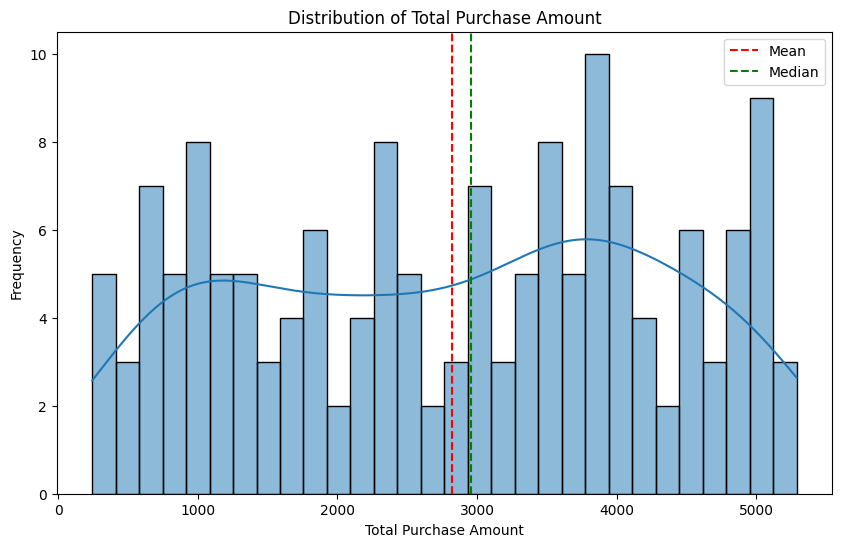

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
mean_totalpurchaseamount = fraud_df_selected['totalpurchaseamount'].mean()
median_totalpurchaseamount = fraud_df_selected['totalpurchaseamount'].median()
std_totalpurchaseamount = fraud_df_selected['totalpurchaseamount'].std()

print(f"Mean Total Purchase Amount: {mean_totalpurchaseamount}")
print(f"Median Total Purchase Amount: {median_totalpurchaseamount}")
print(f"Standard Deviation of Total Purchase Amount: {std_totalpurchaseamount}")

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(fraud_df_selected['totalpurchaseamount'], kde=True, bins=30)
plt.axvline(mean_totalpurchaseamount, color='r', linestyle='--', label='Mean')
plt.axvline(median_totalpurchaseamount, color='g', linestyle='--', label='Median')
plt.title('Distribution of Total Purchase Amount')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [181]:
# Define threshold based on mean and standard deviation
threshold = mean_totalpurchaseamount + std_totalpurchaseamount

# Alternatively, set threshold based on percentile
threshold_percentile = fraud_df_selected['totalpurchaseamount'].quantile(0.95)

print(f"Threshold based on mean + std: {threshold}")
print(f"Threshold based on 95th percentile: {threshold_percentile}")

# Apply the threshold to create the target variable
fraud_df_selected['is_fraud'] = (fraud_df_selected['totalpurchaseamount'] > threshold_percentile).astype(int)


Threshold based on mean + std: 4292.570042003691
Threshold based on 95th percentile: 5024.4


C:\Users\Edidem\AppData\Local\Temp\ipykernel_1480\2807678936.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df_selected['is_fraud'] = (fraud_df_selected['totalpurchaseamount'] > threshold_percentile).astype(int)


In [182]:
# Check for missing values
print(fraud_df_selected.isnull().sum())

# Drop rows with missing values
fraud_df_clean = fraud_df_selected.dropna()


age                         0
totalspend                  0
itemspurchased              0
productprice                0
totalpurchaseamount         0
couponused                  0
cashbackamount              0
ordercount                  0
dayssincelastpurchase       0
daysincelastorder           0
quantity                    0
unitprice                   0
hourspendonapp              0
numberofdeviceregistered    0
complain                    0
churn                       0
tenure                      0
gender                      0
city                        0
membershiptype              0
paymentmethod               0
shipmode                    0
is_fraud                    0
dtype: int64


In [184]:
from sklearn.preprocessing import OneHotEncoder

def encode_categorical(df, categorical_columns):
    """
    Encode categorical columns using one-hot encoding.
    
    Parameters:
    - df (DataFrame): The dataframe with categorical columns to encode.
    - categorical_columns (list): List of categorical column names to encode.
    
    Returns:
    - DataFrame with encoded categorical columns
    """
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity
    encoded_features = encoder.fit_transform(df[categorical_columns])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
    
    return pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

categorical_columns = ['gender', 'city', 'membershiptype', 'paymentmethod', 'shipmode']

# Apply encoding
fraud_df_encoded = encode_categorical(fraud_df_clean, categorical_columns)


In [185]:
from sklearn.preprocessing import StandardScaler

def standardize_numerical(df, numerical_columns):
    scaler = StandardScaler()
    standardized_features = scaler.fit_transform(df[numerical_columns])
    standardized_df = pd.DataFrame(standardized_features, columns=numerical_columns)
    return pd.concat([df.drop(numerical_columns, axis=1), standardized_df], axis=1)

numerical_columns = ['age', 'totalspend', 'itemspurchased', 'productprice', 'totalpurchaseamount', 
                      'couponused', 'cashbackamount', 'ordercount', 'dayssincelastpurchase', 
                      'daysincelastorder', 'quantity', 'unitprice', 'hourspendonapp', 
                      'numberofdeviceregistered', 'complain', 'churn', 'tenure']

fraud_df_standardized = standardize_numerical(fraud_df_encoded, numerical_columns)



In [186]:
from sklearn.model_selection import train_test_split

X = fraud_df_standardized.drop('is_fraud', axis=1)
y = fraud_df_standardized['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (122, 30), Testing set: (31, 30)


### Model Selection

In [187]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC



# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

# Train the models and collect the results
results = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train_res, y_train_res)
    
    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC score
    
    # Collect metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Extract metrics
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']
    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
    
    # Store results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'ROC AUC': roc_auc
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training Support Vector Machine...


c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Edidem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.903226,0.0,0.0,0.0,0.866667
1,Decision Tree,1.000000,1.0,1.0,1.0,1.000000
2,Random Forest,1.000000,1.0,1.0,1.0,1.000000
3,Gradient Boosting,1.000000,1.0,1.0,1.0,1.000000
4,Support Vector Machine,0.967742,0.0,0.0,0.0,1.000000


In [188]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree' : DecisionTreeClassifier(random_state=42)
}

# Perform cross-validation and collect the results
results = []

for model_name, model in models.items():
    print(f"Evaluating {model_name} with cross-validation...")
    
    # Cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    roc_auc_scores = cross_val_score(model, X, y, cv=skf, scoring='roc_auc')
    
    # Store results
    results.append({
        'Model': model_name,
        'Mean Accuracy': accuracy_scores.mean(),
        'Mean ROC AUC': roc_auc_scores.mean()
    })

# Create a DataFrame from the results
cv_results_df = pd.DataFrame(results)
cv_results_df


Evaluating Random Forest with cross-validation...
Evaluating Gradient Boosting with cross-validation...
Evaluating Decision Tree with cross-validation...


,Model,Mean Accuracy,Mean ROC AUC
0,Random Forest,0.947957,1.00
1,Gradient Boosting,0.993548,0.95
2,Decision Tree,0.993548,0.95


In [384]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd


# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train_res, y_train_res)

# Get the best model and parameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Parameters for RandomForest: {best_params}")



{'n_estimators': [50, 100, 150],
 'max_depth': [10, 20, 30],
 'min_samples_split': [2, 5, 10]}

In [385]:

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train_res, y_train_res)

# Get the best model and parameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Parameters for RandomForest: {best_params}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for RandomForest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the Random Forest model with the best parameters
best_params = {
    'n_estimators': 50,  
    'max_depth': 10,
    'min_samples_split': 2
}
model = RandomForestClassifier(**best_params, random_state=42)

# Train the model
model.fit(X_train_res, y_train_res)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Collect metrics
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Extract metrics
precision = report['1']['precision']
recall = report['1']['recall']
f1_score = report['1']['f1-score']
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()

# Print the results
print(f"Final Model: Random Forest")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")


Final Model: Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000
Confusion Matrix:
[[30  0]
 [ 0  1]]


In [191]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from joblib import dump

# Load the dataset
fraud_df = pd.read_csv('cleaned_data.csv')

# Define the selected features
selected_features = [
    'age', 'totalspend', 'itemspurchased', 'productprice', 'totalpurchaseamount',
    'couponused', 'cashbackamount', 'ordercount', 'dayssincelastpurchase',
    'daysincelastorder', 'quantity', 'unitprice', 'hourspendonapp',
    'numberofdeviceregistered', 'complain', 'churn', 'tenure',
    'gender', 'city', 'membershiptype', 'paymentmethod',
    'shipmode'
]

# Select the features from the dataset
fraud_df_selected = fraud_df[selected_features].copy()

# Define the target variable based on a threshold
threshold_percentile = fraud_df_selected['totalpurchaseamount'].quantile(0.95)
fraud_df_selected.loc[:, 'is_fraud'] = (fraud_df_selected['totalpurchaseamount'] > threshold_percentile).astype(int)

# Define features and target
X = fraud_df_selected.drop('is_fraud', axis=1)
y = fraud_df_selected['is_fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_columns = ['gender', 'city', 'membershiptype', 'paymentmethod', 'shipmode']
numerical_columns = [col for col in X.columns if col not in categorical_columns]

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_columns)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline
dump(pipeline, 'fraud_detection_pipeline.joblib')

# Extract feature importances
def get_feature_importances(pipeline, X_train):
    # Extract the feature importances from the trained Random Forest model
    model = pipeline.named_steps['classifier']
    preprocessor = pipeline.named_steps['preprocessor']
    
    # Transform the training data to match the features used in the model
    X_train_transformed = preprocessor.transform(X_train)
    
    # Extract feature names
    numerical_feature_names = numerical_columns
    categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
    all_feature_names = numerical_feature_names + list(categorical_feature_names)
    
    # Check if the feature names and importances lengths match
    if len(all_feature_names) != len(model.feature_importances_):
        raise ValueError("Length of feature names and feature importances do not match.")
    
    # Create a DataFrame for feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    return feature_importance_df

# Get feature importances and display
feature_importance_df = get_feature_importances(pipeline, X_train)
feature_importance_df


,Feature,Importance
4,totalpurchaseamount,0.353806
3,productprice,0.112515
6,cashbackamount,0.089303
8,dayssincelastpurchase,0.075981
1,totalspend,0.064869
13,numberofdeviceregistered,0.041801
0,age,0.038547
11,unitprice,0.035546
2,itemspurchased,0.034340
16,tenure,0.028455


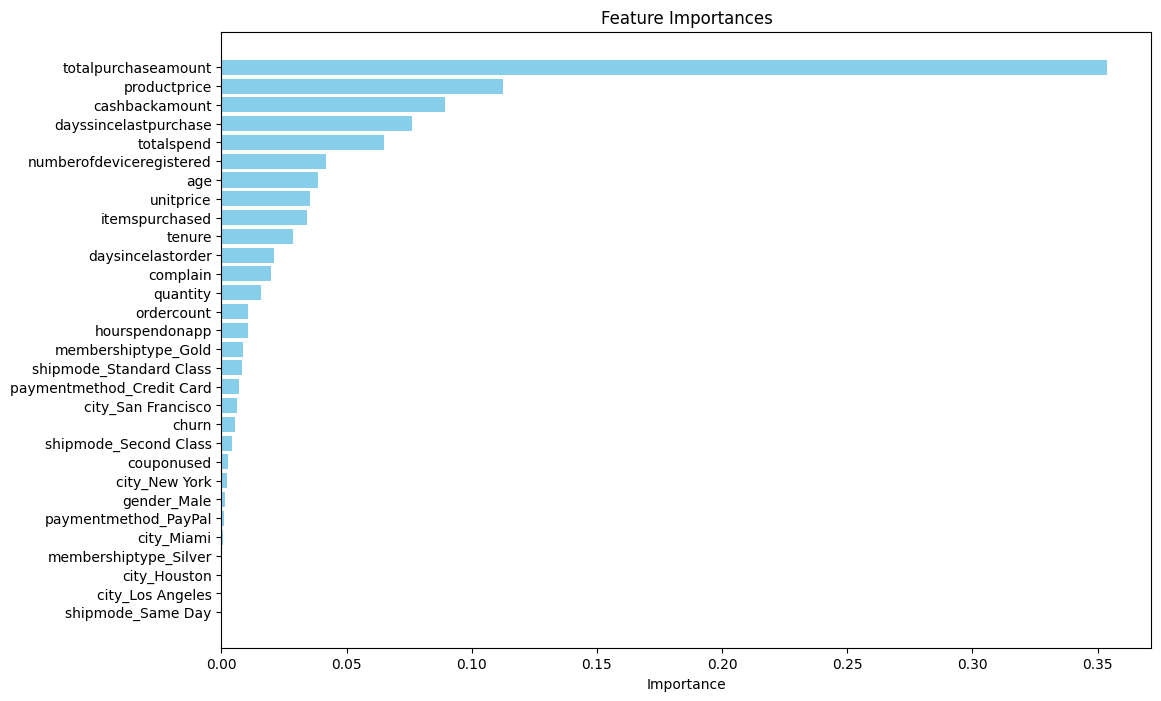

In [192]:
import matplotlib.pyplot as plt

# Plot feature importances
def plot_feature_importances(feature_importance_df):
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importances')
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.show()

# Get feature importances and plot
feature_importance_df = get_feature_importances(pipeline, X_train)
plot_feature_importances(feature_importance_df)


## Personalized recommendation


In [240]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors
import joblib

# Load your dataset
data = pd.read_csv('cleaned_data.csv')

# Define the selected columns for personalized recommendation
selected_columns = [
    'customerid', 'gender', 'age', 'city', 'membershiptype',
    'itemspurchased', 'dayssincelastpurchase', 'hourspendonapp',
    'productid', 'productcategory', 'productprice', 'quantity', 'ordercount'
]

# Select the data
recommendation_df = data[selected_columns]



In [364]:
recommendation_df.head()

,customerid,gender,age,city,membershiptype,itemspurchased,dayssincelastpurchase,hourspendonapp,productid,productcategory,productprice,quantity,ordercount
0,101.0,Female,29.0,New York,Gold,14.0,25.0,3.0,0a37e05528984f47c754837344732fbb,Home,177.0,6,1.0
1,104.0,Male,30.0,San Francisco,Gold,19.0,12.0,2.0,b60a0c8bd0333c69ee70565973709bbf,Electronics,396.0,6,1.0
2,106.0,Female,37.0,Houston,Bronze,8.0,22.0,3.0,08462528607b71ea62cbc019d91b001e,Home,191.0,2,6.0
3,112.0,Female,36.0,Houston,Bronze,7.0,20.0,3.0,76951acb34204078c0dc377dfc4233aa,Home,304.0,6,1.0
4,113.0,Female,30.0,New York,Gold,16.0,21.0,2.0,6cdd53843498f92890544667809f1595,Books,54.0,8,2.0


In [249]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define the columns for encoding and scaling
categorical_columns = ['gender', 'city', 'membershiptype', 'productcategory']
numerical_columns = ['age', 'dayssincelastpurchase', 'hourspendonapp', 'productprice', 'quantity', 'ordercount']


# Create the column transformer with 'handle_unknown' set to 'ignore'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ]
)


In [250]:
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Content-Based Filtering Model
content_based_model = NearestNeighbors(n_neighbors=5)
content_based_model.fit(X_train_preprocessed)

# Collaborative Filtering Model
svd = TruncatedSVD(n_components=10)
X_train_reduced = svd.fit_transform(X_train_preprocessed)
X_test_reduced = svd.transform(X_test_preprocessed)

collaborative_model = NearestNeighbors(n_neighbors=5)
collaborative_model.fit(X_train_reduced)

# Evaluate the models
def evaluate_recommendation_model(model, X_test, model_type):
    if model_type == 'content_based':
        distances, _ = model.kneighbors(X_test)
    elif model_type == 'collaborative':
        distances, _ = model.kneighbors(X_test)
    
    mean_distance = np.mean(distances)
    return mean_distance

# Evaluate content-based model
content_based_distance = evaluate_recommendation_model(content_based_model, X_test_preprocessed, 'content_based')

# Evaluate collaborative model
collaborative_distance = evaluate_recommendation_model(collaborative_model, X_test_reduced, 'collaborative')

print(f'Content-Based Filtering Mean Distance: {content_based_distance}')
print(f'Collaborative Filtering Mean Distance: {collaborative_distance}')

# Select the best model based on the evaluation metric
best_model = collaborative_model if collaborative_distance < content_based_distance else content_based_model
best_model_type = 'collaborative' if collaborative_distance < content_based_distance else 'content_based'

best_model_type


Content-Based Filtering Mean Distance: 1.8879252773742459
Collaborative Filtering Mean Distance: 1.6021570319841396


'collaborative'

In [251]:
import joblib
from sklearn.pipeline import Pipeline

# Create the best model pipeline
if best_model_type == 'collaborative':
    pipeline_best_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('svd', svd),
        ('model', best_model)
    ])
else:
    pipeline_best_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', best_model)
    ])

# Save the pipeline
joblib.dump(pipeline_best_model, 'recommender.joblib')


['recommender.joblib']

# Demand Forcasting task

In [389]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load your dataset
demand_df = pd.read_csv('cleaned_data.csv')

# Select relevant columns for demand forecasting
columns = ['timestamp', 'productcategory', 'quantity']
demand_df = demand_df[columns]

demand_df.head()




,timestamp,productcategory,quantity
0,21-11-2017 22:34,Home,6
1,1/6/2018 22:22,Electronics,6
2,4/8/2018 21:57,Home,2
3,18-07-2017 14:26,Home,6
4,16-07-2018 12:41,Books,8


In [390]:
# Convert 'timestamp' to datetime with a specified format
demand_df['timestamp'] = pd.to_datetime(demand_df['timestamp'], errors='coerce')



# Extract date features from 'timestamp'
demand_df['year'] = demand_df['timestamp'].dt.year
demand_df['month'] = demand_df['timestamp'].dt.month
demand_df['day'] = demand_df['timestamp'].dt.day

demand_df['year'] = demand_df['year'].map('{:g}'.format)
demand_df['month'] = demand_df['month'].map('{:g}'.format)
demand_df['day'] = demand_df['day'].map('{:g}'.format)

# Group by date and product category, aggregating the quantity
demand_df = demand_df.groupby(['year', 'month', 'day', 'productcategory']).agg({'quantity': 'sum'}).reset_index()

# Define categorical and numerical columns
categorical_columns = ['productcategory']
numerical_columns = ['year', 'month', 'day']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_columns)
    ]
)

# Prepare features and target variable
X = demand_df.drop(columns=['quantity'])
y = demand_df['quantity']

# Fit and transform the data
X_transformed = preprocessor.fit_transform(X)

# Now X_transformed and y are ready for fitting into a time series forecasting model


In [339]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit ARIMA model
arima_model = ARIMA(y_train, order=(5, 1, 0))
arima_fit = arima_model.fit()

# Make predictions with ARIMA
start = len(y_train)
end = start + len(y_test) - 1
arima_predictions = arima_fit.predict(start=start, end=end, typ='levels')

# Calculate MAE for ARIMA
arima_mae = mean_absolute_error(y_test, arima_predictions)
print("ARIMA MAE:", arima_mae)

# Fit SARIMA model
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Make predictions with SARIMA
sarima_predictions = sarima_fit.forecast(steps=len(X_test))

# Calculate MAE for SARIMA
sarima_mae = mean_absolute_error(y_test, sarima_predictions)
print("SARIMA MAE:", sarima_mae)

# Fit Holt’s Linear Trend model
holt_model = ExponentialSmoothing(y_train, trend='add')
holt_fit = holt_model.fit()

# Make predictions with Holt’s Linear Trend
holt_predictions = holt_fit.forecast(steps=len(X_test))

# Calculate MAE for Holt’s Linear Trend
holt_mae = mean_absolute_error(y_test, holt_predictions)
print("Holt’s Linear Trend MAE:", holt_mae)

ARIMA MAE: 75.79424363708809
SARIMA MAE: 76.44496864272361
Holt’s Linear Trend MAE: 77.6291981093071


In [340]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA



# Grid search for ARIMA hyperparameters
def evaluate_arima_order(order, y_train, y_test):
    try:
        model = ARIMA(y_train, order=order)
        model_fit = model.fit()
        start = len(y_train)
        end = start + len(y_test) - 1
        predictions = model_fit.predict(start=start, end=end, typ='levels')
        mae = mean_absolute_error(y_test, predictions)
        return mae
    except Exception as e:
        print(f"Error with order {order}: {e}")
        return np.inf

# Define parameter ranges
p_values = range(0, 5)  # AR term
d_values = range(0, 3)  # I term
q_values = range(0, 5)  # MA term

best_mae = np.inf
best_order = None

# Grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            mae = evaluate_arima_order(order, y_train, y_test)
            if mae < best_mae:
                best_mae = mae
                best_order = order

print(f"Best ARIMA order: {best_order}")
print(f"Best MAE: {best_mae}")

# Fit ARIMA model with best parameters
best_arima_model = ARIMA(y_train, order=best_order)
best_arima_fit = best_arima_model.fit()

# Make predictions with best model
start = len(y_train)
end = start + len(y_test) - 1
best_arima_predictions = best_arima_fit.predict(start=start, end=end, typ='levels')

# Calculate and print final MAE
best_arima_mae = mean_absolute_error(y_test, best_arima_predictions)
print(f"Final ARIMA MAE with best parameters: {best_arima_mae}")


Best ARIMA order: (3, 2, 1)
Best MAE: 75.26739986765908
Final ARIMA MAE with best parameters: 75.26739986765908


ARIMA MAE: 22.370308104614306


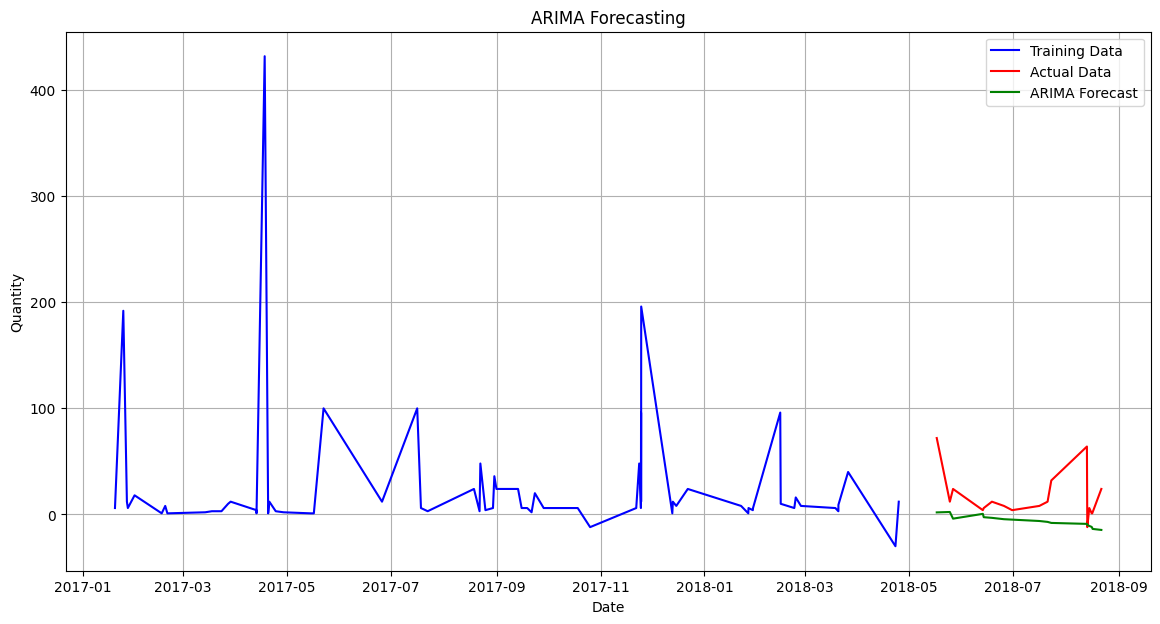

In [341]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset
demand_df = pd.read_csv('cleaned_data.csv')

# Select relevant columns and preprocess
# Convert 'timestamp' to datetime with a specified format
demand_df['timestamp'] = pd.to_datetime(demand_df['timestamp'], errors='coerce')

# Extract date features from 'timestamp'
demand_df['year'] = demand_df['timestamp'].dt.year
demand_df['month'] = demand_df['timestamp'].dt.month
demand_df['day'] = demand_df['timestamp'].dt.day

demand_df['year'] = demand_df['year'].map('{:g}'.format)
demand_df['month'] = demand_df['month'].map('{:g}'.format)
demand_df['day'] = demand_df['day'].map('{:g}'.format)

demand_df = demand_df.groupby('timestamp').agg({'quantity': 'sum'}).reset_index()
demand_df.set_index('timestamp', inplace=True)

# Split the data into training and testing sets
train_size = int(len(demand_df) * 0.8)
train, test = demand_df.iloc[:train_size], demand_df.iloc[train_size:]

# Fit ARIMA model with best parameters
arima_model = ARIMA(train['quantity'], order=(3, 2, 1))
arima_fit = arima_model.fit()

# Make predictions
arima_predictions = arima_fit.forecast(steps=len(test))

# Calculate MAE for ARIMA
arima_mae = mean_absolute_error(test['quantity'], arima_predictions)
print("ARIMA MAE:", arima_mae)

# Plot the results
plt.figure(figsize=(14, 7))

plt.plot(train.index, train['quantity'], label='Training Data', color='blue')
plt.plot(test.index, test['quantity'], label='Actual Data', color='red')
plt.plot(test.index, arima_predictions, label='ARIMA Forecast', color='green')

plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()
